In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt
from scipy. stats import ttest_ind
from scipy. stats import mannwhitneyu
from scipy.stats import f_oneway
from scipy.stats import fisher_exact
from scipy.stats import kstest
import statsmodels.api as sm
from scipy.stats import shapiro


In [ ]:
df = pd.read_csv('glioma.csv')

In [ ]:
for i in range(df.shape[0]):
  df['time_to_trans'].iloc[i] = int(df['time_to_trans'].iloc[i].split()[0])

<ipython-input-3-2b02a5316bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_trans'].iloc[i] = int(df['time_to_trans'].iloc[i].split()[0])


In [ ]:
df['surgery_type'].unique()

array(['удаление', 'СТБ', 'резекция', 'Удаление', 'удаление '],
      dtype=object)

In [ ]:
df.replace('резекция', 'удаление', inplace=True)
df.replace('Удаление', 'удаление', inplace=True)
df.replace('удаление ', 'удаление', inplace=True)

In [ ]:
df['surgery_type'].unique()

array(['удаление', 'СТБ'], dtype=object)

In [ ]:
df['histology_2'].unique()

array(['глиобластома', 'анапластическая астроцитома',
       'анапластическая олигодендроглиома',
       'анапластическая олигоастроцитома', 'анаспластическая астроцитома',
       'анапластическая олигоастроцитома ',
       'анапластическая астроцитома ', 'глиобластома ',
       'анапластическая ОА'], dtype=object)

In [ ]:
df.replace('анаспластическая астроцитома', 'анапластическая астроцитома', inplace=True)
df.replace('анапластическая олигоастроцитома ', 'анапластическая олигоастроцитома', inplace=True)
df.replace('анапластическая астроцитома ', 'анапластическая астроцитома', inplace=True)
df.replace('глиобластома ', 'глиобластома', inplace=True)
df.replace('анапластическая ОА', 'анапластическая олигоастроцитома', inplace=True)

In [ ]:
df['histology_2'].unique()

array(['глиобластома', 'анапластическая астроцитома',
       'анапластическая олигодендроглиома',
       'анапластическая олигоастроцитома'], dtype=object)

In [ ]:
df = df.loc[df['time_to_trans'] > 3]

In [ ]:
df.head(10)

,histology_1,ki67,surgery_type,kps,time_to_trans,histology_2
0,астроцитома,*,удаление,70,22,глиобластома
1,астроцитома,*,СТБ,90,56,глиобластома
2,астроцитома,*,СТБ,70,38,анапластическая астроцитома
3,астроцитома,*,удаление,90,31,глиобластома
4,астроцитома,*,СТБ,90,34,глиобластома
5,олигодендроглиома,*,удаление,80,136,анапластическая олигодендроглиома
6,астроцитома,*,удаление,90,87,глиобластома
7,олигоастроцитома,высокий,удаление,90,132,глиобластома
8,астроцитома,*,удаление,80,17,анапластическая астроцитома
9,олигодендроглиома,*,СТБ,90,110,анапластическая олигодендроглиома


In [ ]:
df.shape

(134, 6)

In [ ]:
astro = df[df['histology_1'] == 'астроцитома']['time_to_trans'].to_numpy()
oligo = df[df['histology_1'] == 'олигодендроглиома']['time_to_trans'].to_numpy()
oligoastro = df[df['histology_1'] == 'олигоастроцитома']['time_to_trans'].to_numpy()
oligo_component = np.concatenate((oligo, oligoastro))
all = np.concatenate((oligo, oligoastro, astro))

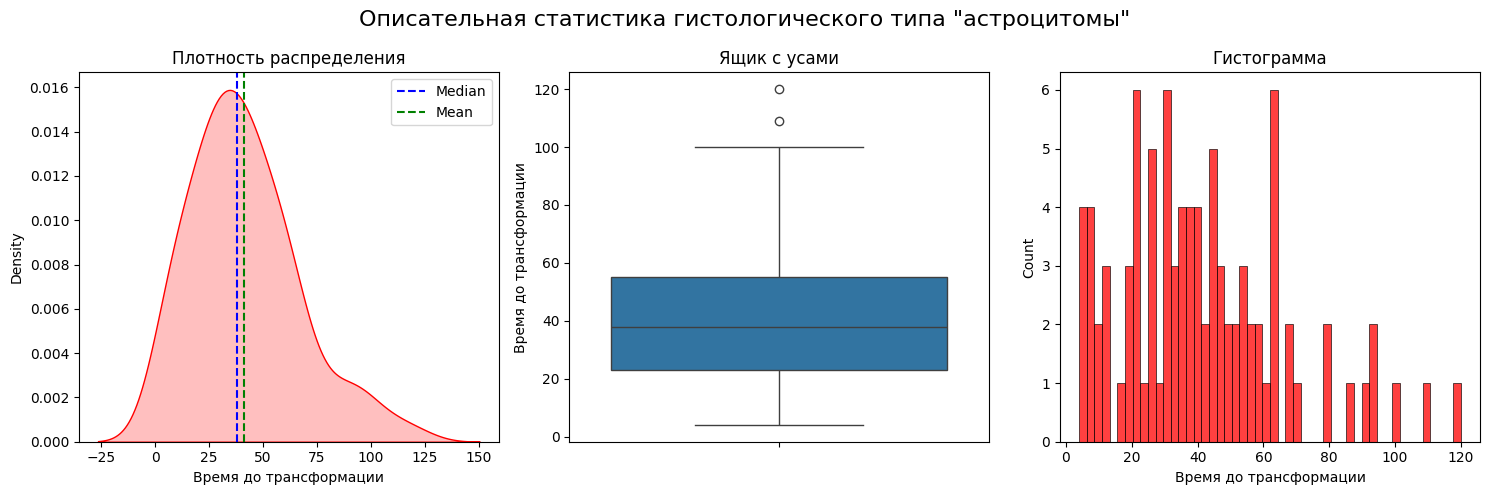

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
median_value = np.median(astro)
mean_value = np.mean(astro)
# Плотность распределения
sns.kdeplot(data=astro, fill = True, color='red', ax=axes[0])
axes[0].set_title('Плотность распределения')
axes[0].set_xlabel('Время до трансформации')
axes[0].axvline(x=median_value, color='blue', linestyle='--', label='Median')
axes[0].axvline(x=mean_value, color='green', linestyle='--', label='Mean')
axes[0].legend()
# Ящик с усами
sns.boxplot(data=astro, ax=axes[1])
axes[1].set_title('Ящик с усами')
axes[1].set_ylabel('Время до трансформации')

# Гистограмма
sns.histplot(data=astro, bins=50, color='red', ax=axes[2])
axes[2].set_title('Гистограмма')
axes[2].set_xlabel('Время до трансформации')

fig.suptitle('Описательная статистика гистологического типа "астроцитомы"', fontsize=16)

# Отображение графиков
plt.tight_layout()
plt.show()

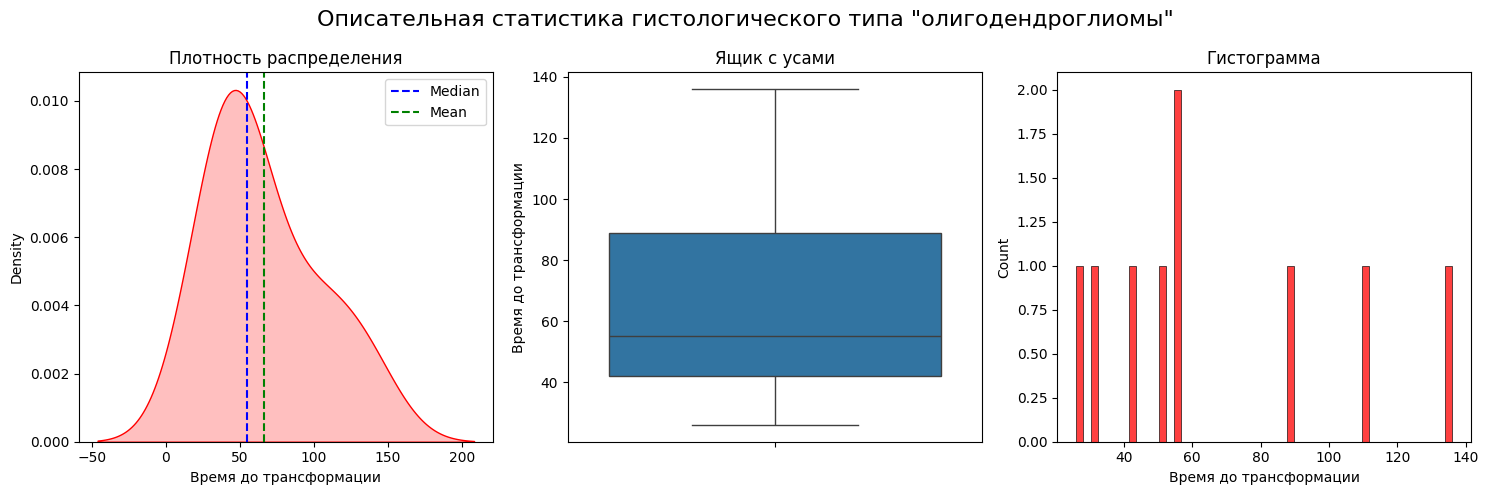

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
median_value = np.median(oligo)
mean_value = np.mean(oligo)
# Плотность распределения
sns.kdeplot(data=oligo, fill = True, color='red', ax=axes[0])
axes[0].set_title('Плотность распределения')
axes[0].set_xlabel('Время до трансформации')
axes[0].axvline(x=median_value, color='blue', linestyle='--', label='Median')
axes[0].axvline(x=mean_value, color='green', linestyle='--', label='Mean')
axes[0].legend()
# Ящик с усами
sns.boxplot(data=oligo, ax=axes[1])
axes[1].set_title('Ящик с усами')
axes[1].set_ylabel('Время до трансформации')

# Гистограмма
sns.histplot(data=oligo, bins=50, color='red', ax=axes[2])
axes[2].set_title('Гистограмма')
axes[2].set_xlabel('Время до трансформации')

fig.suptitle('Описательная статистика гистологического типа "олигодендроглиомы"', fontsize=16)

# Отображение графиков
plt.tight_layout()
plt.show()

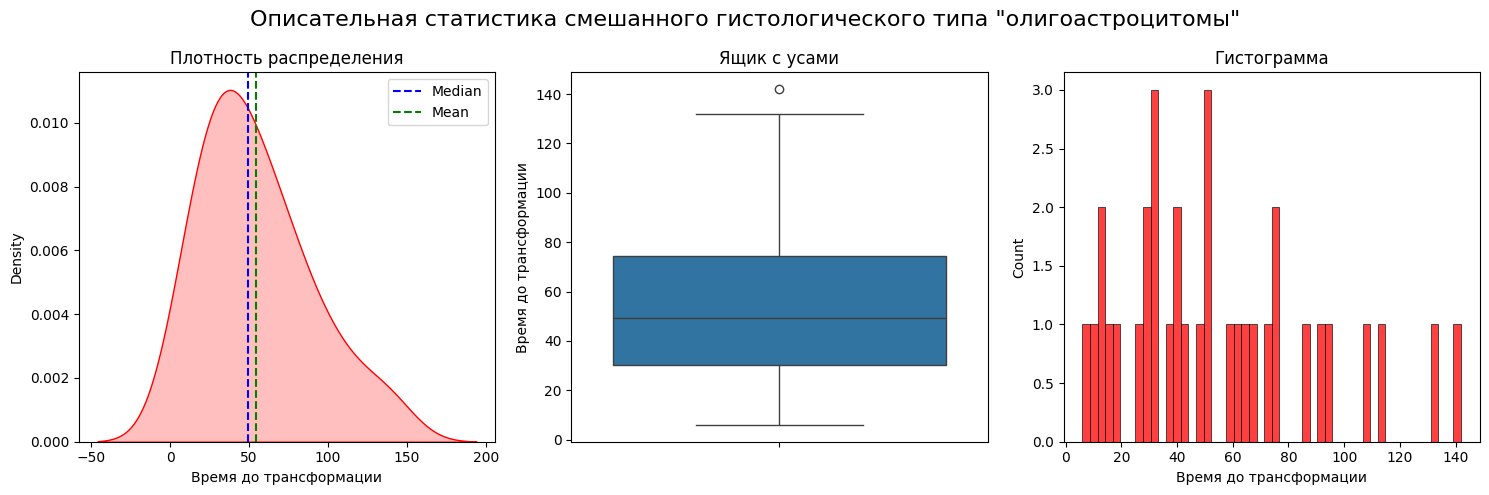

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
median_value = np.median(oligoastro)
mean_value = np.mean(oligoastro)
# Плотность распределения
sns.kdeplot(data=oligoastro, fill = True, color='red', ax=axes[0])
axes[0].set_title('Плотность распределения')
axes[0].set_xlabel('Время до трансформации')
axes[0].axvline(x=median_value, color='blue', linestyle='--', label='Median')
axes[0].axvline(x=mean_value, color='green', linestyle='--', label='Mean')
axes[0].legend()
# Ящик с усами
sns.boxplot(data=oligoastro, ax=axes[1])
axes[1].set_title('Ящик с усами')
axes[1].set_ylabel('Время до трансформации')

# Гистограмма
sns.histplot(data=oligoastro, bins=50, color='red', ax=axes[2])
axes[2].set_title('Гистограмма')
axes[2].set_xlabel('Время до трансформации')

fig.suptitle('Описательная статистика смешанного гистологического типа "олигоастроцитомы"', fontsize=16)

# Отображение графиков
plt.tight_layout()
plt.show()

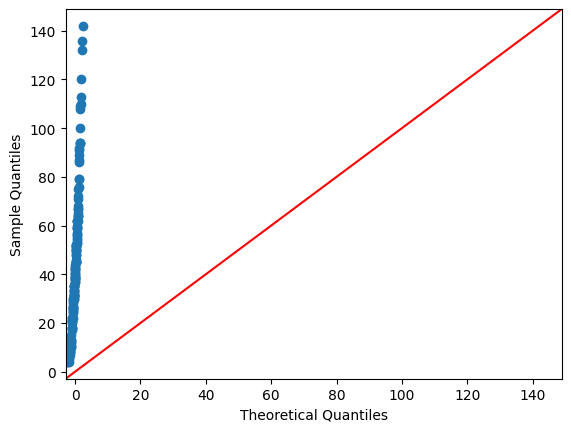

In [ ]:
fig = sm.qqplot(all, line='45')
plt.show()

In [ ]:
'{0:.10f}'.format(shapiro(all).pvalue)

'0.0000037659'

In [ ]:
kstest(all, 'norm')

KstestResult(statistic=0.9999683287581669, pvalue=0.0, statistic_location=4, statistic_sign=-1)

In [ ]:
len(oligoastro)

34

In [ ]:
ttest_ind(astro, oligo).pvalue * 3

0.02317564948622376

In [ ]:
ttest_ind(astro, oligoastro).pvalue * 2

0.04037269111519615

In [ ]:
ttest_ind(oligoastro, oligo).pvalue

0.3857628248164291

In [ ]:
mannwhitneyu(astro, oligo).pvalue * 3

0.12167528689650067

In [ ]:
mannwhitneyu(astro, oligoastro).pvalue

0.0721910579493654

In [ ]:
mannwhitneyu(oligoastro, oligo).pvalue

0.3783748293716761

In [ ]:
f_oneway(oligoastro, oligo, astro)

F_onewayResult(statistic=4.962450224253332, pvalue=0.00836706439806626)

In [ ]:
ttest_ind(oligo_component, astro)

TtestResult(statistic=2.956290111729923, pvalue=0.0036894377672230865, df=132.0)

In [ ]:
mannwhitneyu(astro, oligo_component)

MannwhitneyuResult(statistic=1461.5, pvalue=0.018411026720246568)

In [ ]:
df_ki67 = df[df['ki67'] != '*']

In [ ]:
df_ki67.shape

(59, 6)

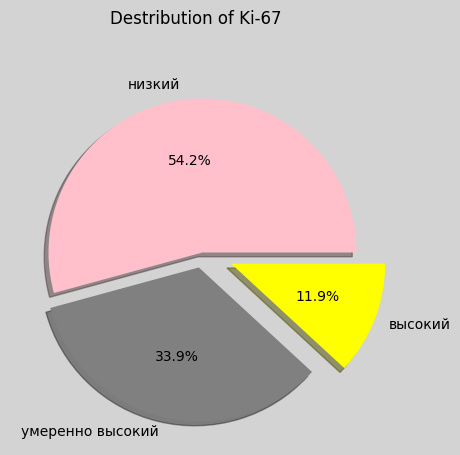

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5), facecolor='lightgray')
values = df_ki67.ki67.value_counts()
labels = values.index
fig.suptitle('Destribution of Ki-67')
#colors = plt.cm.cividis(np.linspace(0, 1, len(values)))
colors = ['pink', 'gray', 'yellow']
ax.pie(x=values, labels=labels, autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1, 0.2], colors=colors)
None

In [ ]:
astro_ki67 = df_ki67[df_ki67['histology_1'] == 'астроцитома']
oligocomp_ki67 = df_ki67[(df_ki67['histology_1'] == 'олигодендроглиома') | (df_ki67['histology_1'] == 'олигоастроцитома')]

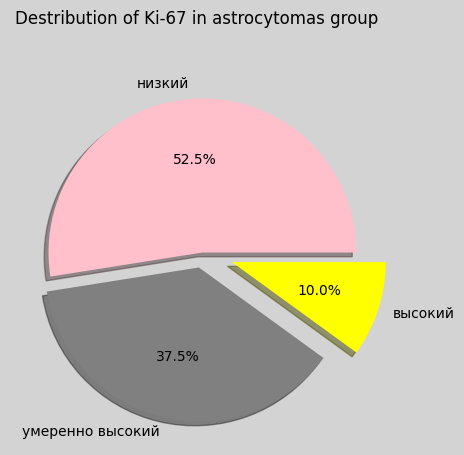

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5), facecolor='lightgray')
values = astro_ki67.ki67.value_counts()
labels = values.index
fig.suptitle('Destribution of Ki-67 in astrocytomas group')
#colors = plt.cm.cividis(np.linspace(0, 1, len(values)))
colors = ['pink', 'gray', 'yellow']
ax.pie(x=values, labels=labels, autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1, 0.2], colors=colors)
None

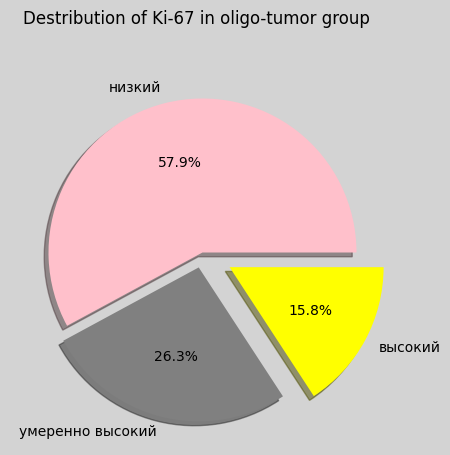

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5), facecolor='lightgray')
values = oligocomp_ki67.ki67.value_counts()
labels = values.index
fig.suptitle('Destribution of Ki-67 in oligo-tumor group')
#colors = plt.cm.cividis(np.linspace(0, 1, len(values)))
colors = ['pink', 'gray', 'yellow']
ax.pie(x=values, labels=labels, autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1, 0.2], colors=colors)
None

In [ ]:
oligocomp_ki67.ki67.value_counts()

низкий              11
умеренно высокий     5
высокий              3
Name: ki67, dtype: int64

In [ ]:
astro_ki67.ki67.value_counts()

низкий              21
умеренно высокий    15
высокий              4
Name: ki67, dtype: int64

In [ ]:
table_1 = {
    'Astrocytomas' : [4, 15],
    'Oligogliomas' : [3, 5]
} # высокий и умеренно высокий
table_2 = {
    'Astrocytomas' : [4, 21],
    'Oligogliomas' : [3, 11]
} # высокий и низкий
table_3 = {
    'Astrocytomas' : [15, 21],
    'Oligogliomas' : [5, 1]
} #умеренно высокий и низкий
index_1 = ['High Ki-67', 'Moderate Ki-67']
index_2 = ['High Ki-67', 'Low Ki-67']
index_3 = ['Moderate Ki-67', 'Low Ki-67']

ki_1 = pd.DataFrame(table_1, index=index_1)
ki_2 = pd.DataFrame(table_2, index=index_2)
ki_3 = pd.DataFrame(table_3, index=index_3)


In [ ]:
ki_3

,Astrocytomas,Oligogliomas
Moderate Ki-67,15,5
Low Ki-67,21,1


In [ ]:
fisher_exact(ki_3)

SignificanceResult(statistic=0.14285714285714285, pvalue=0.08663353785305004)

In [ ]:
high = df_ki67[df_ki67['ki67'] == 'высокий'].time_to_trans.to_numpy()
moderate = df_ki67[df_ki67['ki67'] == 'умеренно высокий'].time_to_trans.to_numpy()
less = df_ki67[df_ki67['ki67'] == 'низкий'].time_to_trans.to_numpy()

In [ ]:
high

array([132,   8,   7,  94,  32,  21,  13])

In [ ]:
moderate

array([37, 75, 59, 25, 92, 64, 62, 94, 40, 31, 64, 45, 48, 79, 53,  4,  4,
       21, 18, 41])

In [ ]:
less

array([39, 40, 71, 39, 45, 35, 30, 10, 62, 62, 52, 86, 26, 32, 38, 52, 42,
       50, 11, 72, 31, 21, 10, 79, 57, 54, 26, 35, 44, 33, 12,  9])

In [ ]:
f_oneway(high, moderate, less)

F_onewayResult(statistic=0.4179508667309381, pvalue=0.6604312643450875)

In [ ]:
df.kps.value_counts()

80     63
90     48
70     19
60      2
100     1
50      1
Name: kps, dtype: int64

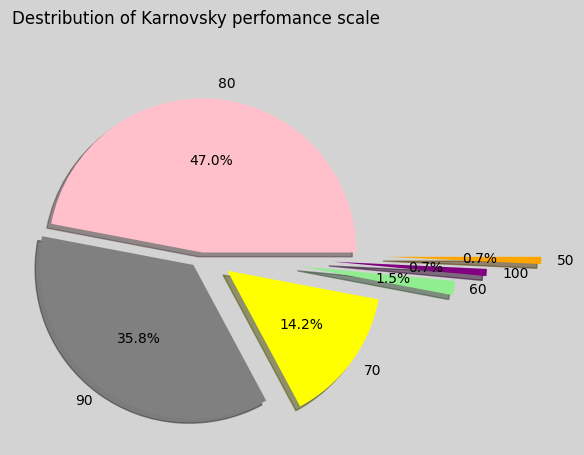

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5), facecolor='lightgray')
values = df.kps.value_counts()
labels = values.index
fig.suptitle('Destribution of Karnovsky perfomance scale')
#colors = plt.cm.cividis(np.linspace(0, 1, len(values)))
colors = ['pink', 'gray', 'yellow', 'lightgreen', 'purple', 'orange']
ax.pie(x=values, labels=labels, autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1, 0.2, 0.65, 0.85, 1.2], colors=colors)
None

In [ ]:
df_kps = df.loc[df['kps'] != 50]

In [ ]:
df_kps = df_kps.loc[df_kps['kps'] != 100]

In [ ]:
df_kps = df_kps.loc[df_kps['kps'] != 60]

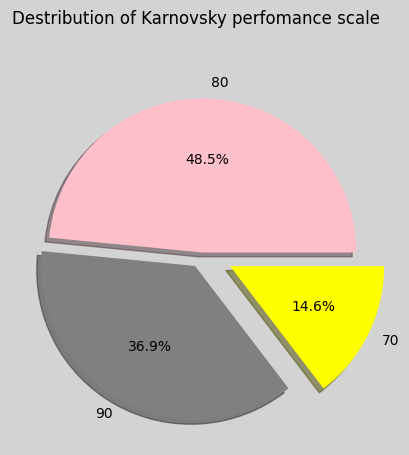

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5), facecolor='lightgray')
values = df_kps.kps.value_counts()
labels = values.index
fig.suptitle('Destribution of Karnovsky perfomance scale')
#colors = plt.cm.cividis(np.linspace(0, 1, len(values)))
colors = ['pink', 'gray', 'yellow']
ax.pie(x=values, labels=labels, autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1, 0.2], colors=colors)
None

In [ ]:
kps_90 = df_kps[df_kps['kps'] == 90].time_to_trans.to_numpy()
kps_80 = df_kps[df_kps['kps'] == 80].time_to_trans.to_numpy()
kps_70 = df_kps[df_kps['kps'] == 70].time_to_trans.to_numpy()

In [ ]:
f_oneway(kps_90, kps_80, kps_70)

F_onewayResult(statistic=0.5940397980501702, pvalue=0.553619086603373)

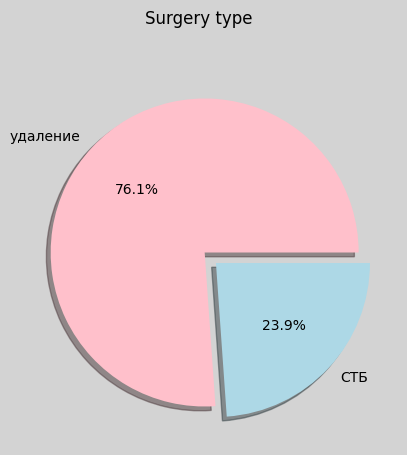

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5), facecolor='lightgray')
values = df.surgery_type.value_counts()
labels = values.index
fig.suptitle('Surgery type')
#colors = plt.cm.inferno_r(np.linspace(0, 1, len(values)))
colors = ['pink', 'lightblue']
ax.pie(x=values, labels=labels, autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1], colors=colors)
None

In [ ]:
stb = df[df['surgery_type'] == 'СТБ']['time_to_trans'].to_numpy()
removal = df[df['surgery_type'] == 'удаление']['time_to_trans'].to_numpy()

In [ ]:
ttest_ind(stb, removal).pvalue

0.3482963201476672

In [ ]:
mannwhitneyu(stb, removal).pvalue

0.43215109773132865

In [ ]:
df.histology_2.value_counts()

глиобластома                         58
анапластическая астроцитома          37
анапластическая олигоастроцитома     27
анапластическая олигодендроглиома    12
Name: histology_2, dtype: int64

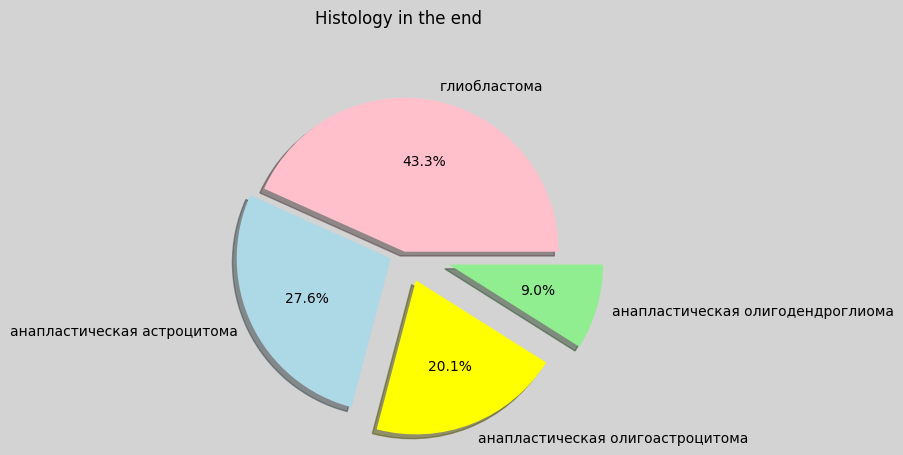

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5), facecolor='lightgray')
values = df.histology_2.value_counts()
labels = values.index
fig.suptitle('Histology in the end')
#colors = plt.cm.inferno_r(np.linspace(0, 1, len(values)))
colors = ['pink', 'lightblue', 'yellow', 'lightgreen']
ax.pie(x=values, labels=labels, autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1, 0.2, 0.3], colors=colors)
None

In [ ]:
astro_df = df[df['histology_1'] == 'астроцитома']
oligo_df = df[(df['histology_1'] == 'олигодендроглиома') | (df['histology_1'] == 'олигоастроцитома')]

In [ ]:
astro_df['histology_2'].value_counts()

глиобластома                         51
анапластическая астроцитома          35
анапластическая олигоастроцитома      4
анапластическая олигодендроглиома     1
Name: histology_2, dtype: int64

In [ ]:
oligo_df['histology_2'].value_counts()

анапластическая олигоастроцитома     23
анапластическая олигодендроглиома    11
глиобластома                          7
анапластическая астроцитома           2
Name: histology_2, dtype: int64

In [ ]:
data = {'Astrocytomas' : [40, 51],
        'Oligogliomas' : [36, 7]
}
index = ['Grade III', 'Grade IV']
df_hist = pd.DataFrame(data, index=index)

In [ ]:
df_hist

,Astrocytomas,Oligogliomas
Grade III,40,36
Grade IV,51,7


In [ ]:
'{0:.10f}'.format(fisher_exact(df_hist).pvalue)

'0.0000128458'

In [ ]:
'{0:.10f}'.format(1.28457 / 100000)

'0.0000128457'